# Crypto prediction


This is a basic example of a simple long-only trading strategy for crypto assets. We use pre-packed data from Fintuna. `get_crypto_features` provides returns, trading volumes and their lagged values (for more details see *End2End Crypto Prediction*). Keep in mind that the data was not intended for production, it was intended to showcase Fintuna.

In [1]:
import fintuna as ft
data, specs = ft.data.get_crypto_features()
data['AAVEUSDT'].iloc[-5:, :5]  # look at a tiny sample of the data (e.g some AAVE features)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,volume,return,volume__change,return__change,volume__shift1
2022-08-30 00:00:00+00:00,-0.467270,0.060569,-0.609921,1.069866,-1.197886
2022-08-30 12:00:00+00:00,-0.676362,0.004662,0.447475,-0.923029,-0.467270
2022-08-31 00:00:00+00:00,-0.020041,-0.019722,-0.970369,-5.230278,-0.676362
2022-08-31 12:00:00+00:00,-0.577161,0.034320,27.798593,-2.740202,-0.020041
2022-09-01 00:00:00+00:00,-0.476985,-0.029748,-0.173567,-1.866803,-0.577161


We are going to use the `LongOnly` model. It predicts whether an asset is going to have positive returns after a period. A period a 12 hours as defined in the `specs`. Each period the asset with the highest confidence (if the estimation is confident enough) is bought. We use `explore` to select hyper-paremters, to train the model and provide an out-of-sample backtest.


[I 2022-09-30 15:42:49,517] A new study created in memory with name: finstudy
INFO:train:start tuning
INFO:train:iteration 1/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.9818313802505146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9818313802505146
[LightGBM] [Warning] lambda_l1 is set=0.8663279761354559, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8663279761354559
[LightGBM] [Warning] lambda_l2 is set=0.20547625125911342, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20547625125911342


INFO:train:iteration 2/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.916309922773969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.916309922773969
[LightGBM] [Warning] lambda_l1 is set=0.0163345876110695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0163345876110695
[LightGBM] [Warning] lambda_l2 is set=0.018255254802399014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018255254802399014


INFO:train:iteration 3/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.5716766437045232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5716766437045232
[LightGBM] [Warning] lambda_l1 is set=2.195773446539456, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.195773446539456
[LightGBM] [Warning] lambda_l2 is set=0.022637229697395487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022637229697395487


INFO:train:iteration 4/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.23358825194833557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.23358825194833557
[LightGBM] [Warning] lambda_l2 is set=0.5073432032394334, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5073432032394334
[LightGBM] [Warning] feature_fraction is set=0.8088177485379385, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088177485379385


INFO:train:iteration 5/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.8333833577228338, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8333833577228338
[LightGBM] [Warning] lambda_l1 is set=0.20468963963126674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20468963963126674
[LightGBM] [Warning] lambda_l2 is set=1.2384930898256403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2384930898256403


INFO:train:iteration 6/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.513558960650023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.513558960650023
[LightGBM] [Warning] lambda_l2 is set=0.20692098656538346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20692098656538346
[LightGBM] [Warning] feature_fraction is set=0.551022405374014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.551022405374014


INFO:train:iteration 7/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.054109905567678765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.054109905567678765
[LightGBM] [Warning] lambda_l2 is set=0.0299853243494544, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0299853243494544
[LightGBM] [Warning] feature_fraction is set=0.8281647947326367, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8281647947326367


INFO:train:iteration 8/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.7343256008238508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7343256008238508
[LightGBM] [Warning] lambda_l1 is set=3.264635677523522, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.264635677523522
[LightGBM] [Warning] lambda_l2 is set=0.01942205696972693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01942205696972693


INFO:train:iteration 9/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.022939802981311864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022939802981311864
[LightGBM] [Warning] lambda_l2 is set=0.07734292502064648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07734292502064648
[LightGBM] [Warning] feature_fraction is set=0.658991589696988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.658991589696988


INFO:train:iteration 10/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.3713164249534622, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3713164249534622
[LightGBM] [Warning] lambda_l2 is set=0.01913469447807098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01913469447807098
[LightGBM] [Warning] feature_fraction is set=0.964648098788107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.964648098788107


INFO:train:iteration 11/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.8603209403261031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8603209403261031
[LightGBM] [Warning] lambda_l1 is set=1.0509957901291773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0509957901291773
[LightGBM] [Warning] lambda_l2 is set=1.5877753320643981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5877753320643981


INFO:train:iteration 12/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.9995043574743891, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9995043574743891
[LightGBM] [Warning] lambda_l1 is set=0.7059197852452204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7059197852452204
[LightGBM] [Warning] lambda_l2 is set=0.2793817360732296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2793817360732296


INFO:train:iteration 13/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.6419740102674933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6419740102674933
[LightGBM] [Warning] lambda_l1 is set=0.15780015740069836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15780015740069836
[LightGBM] [Warning] lambda_l2 is set=0.01339296537303129, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01339296537303129


INFO:train:iteration 14/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.6187694761898348, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6187694761898348
[LightGBM] [Warning] lambda_l1 is set=0.12287550833179427, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12287550833179427
[LightGBM] [Warning] lambda_l2 is set=0.06119962376908012, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06119962376908012


INFO:train:iteration 15/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.982587833124152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.982587833124152
[LightGBM] [Warning] lambda_l1 is set=0.09582402567920822, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09582402567920822
[LightGBM] [Warning] lambda_l2 is set=0.12619687998758675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12619687998758675


INFO:train:iteration 16/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.29056430429231717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.29056430429231717
[LightGBM] [Warning] lambda_l2 is set=0.010964016820597371, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010964016820597371
[LightGBM] [Warning] feature_fraction is set=0.5084893612846959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5084893612846959


INFO:train:iteration 17/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.6824900801611538, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6824900801611538
[LightGBM] [Warning] lambda_l1 is set=0.03754850731805037, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03754850731805037
[LightGBM] [Warning] lambda_l2 is set=2.6365567526677247, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6365567526677247


INFO:train:iteration 18/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.012441684521909923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012441684521909923
[LightGBM] [Warning] lambda_l2 is set=0.046140390250140155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.046140390250140155
[LightGBM] [Warning] feature_fraction is set=0.8805680068985302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8805680068985302


INFO:train:iteration 19/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.030397427680201393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030397427680201393
[LightGBM] [Warning] lambda_l2 is set=0.16686249349210738, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16686249349210738
[LightGBM] [Warning] feature_fraction is set=0.6024764339347705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6024764339347705


INFO:train:iteration 20/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=1.6016593793330114, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6016593793330114
[LightGBM] [Warning] lambda_l2 is set=0.09057662834793208, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09057662834793208
[LightGBM] [Warning] feature_fraction is set=0.9342890489962028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9342890489962028


INFO:train:iteration 21/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=1.34180307901303, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.34180307901303
[LightGBM] [Warning] lambda_l2 is set=0.3607922986069653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3607922986069653
[LightGBM] [Warning] feature_fraction is set=0.9524096344742037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9524096344742037


INFO:train:iteration 22/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.010292017364303307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010292017364303307
[LightGBM] [Warning] lambda_l2 is set=0.015265152132385355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015265152132385355
[LightGBM] [Warning] feature_fraction is set=0.791390195621356, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.791390195621356


INFO:train:iteration 23/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.862853543474543, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.862853543474543
[LightGBM] [Warning] lambda_l2 is set=4.130366518858301, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.130366518858301
[LightGBM] [Warning] feature_fraction is set=0.9206590226052604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9206590226052604


INFO:train:iteration 24/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.07827679136512947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07827679136512947
[LightGBM] [Warning] lambda_l2 is set=0.2400549814297541, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2400549814297541
[LightGBM] [Warning] feature_fraction is set=0.7010629912027522, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7010629912027522


INFO:train:iteration 25/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.0180091994651745, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0180091994651745
[LightGBM] [Warning] lambda_l2 is set=0.1071604805087419, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1071604805087419
[LightGBM] [Warning] feature_fraction is set=0.5317630872872304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5317630872872304


INFO:train:iteration 26/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.4435890490241315, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4435890490241315
[LightGBM] [Warning] lambda_l2 is set=0.7631776984027265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7631776984027265
[LightGBM] [Warning] feature_fraction is set=0.5829126720447225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5829126720447225


INFO:train:iteration 27/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.9021700064024185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9021700064024185
[LightGBM] [Warning] lambda_l1 is set=1.8625120980908694, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8625120980908694
[LightGBM] [Warning] lambda_l2 is set=0.035637615372558176, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.035637615372558176


INFO:train:iteration 28/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.6124451601409542, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6124451601409542
[LightGBM] [Warning] lambda_l2 is set=0.5852780954341225, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5852780954341225
[LightGBM] [Warning] feature_fraction is set=0.7640652291395175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640652291395175


INFO:train:iteration 29/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=6.760735134703583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.760735134703583
[LightGBM] [Warning] lambda_l2 is set=9.138229711873333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.138229711873333
[LightGBM] [Warning] feature_fraction is set=0.6296374020916407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6296374020916407


INFO:train:iteration 30/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.6684037051100861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6684037051100861
[LightGBM] [Warning] lambda_l1 is set=0.33016441304251665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33016441304251665
[LightGBM] [Warning] lambda_l2 is set=0.43349084121356646, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.43349084121356646


INFO:train:iteration 31/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=2.653978943208162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.653978943208162
[LightGBM] [Warning] lambda_l2 is set=0.1905462655818121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1905462655818121
[LightGBM] [Warning] feature_fraction is set=0.6535859699918046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6535859699918046


INFO:train:iteration 32/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.9699335351401435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9699335351401435
[LightGBM] [Warning] lambda_l1 is set=0.5227627526435927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5227627526435927
[LightGBM] [Warning] lambda_l2 is set=0.06676747113332253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06676747113332253


INFO:train:iteration 33/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.015121663116233012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015121663116233012
[LightGBM] [Warning] lambda_l2 is set=5.470399527992684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.470399527992684
[LightGBM] [Warning] feature_fraction is set=0.7512665054120236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7512665054120236


INFO:train:iteration 34/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.04502326015939097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04502326015939097
[LightGBM] [Warning] lambda_l2 is set=0.14737346910030358, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14737346910030358
[LightGBM] [Warning] feature_fraction is set=0.9459911150069116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459911150069116


INFO:train:iteration 35/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.7810164839895336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7810164839895336
[LightGBM] [Warning] lambda_l1 is set=0.02572248877296663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02572248877296663
[LightGBM] [Warning] lambda_l2 is set=0.8984968847109527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8984968847109527


INFO:train:iteration 36/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.18310579261742424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18310579261742424
[LightGBM] [Warning] lambda_l2 is set=0.08060850778109477, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08060850778109477
[LightGBM] [Warning] feature_fraction is set=0.7219948245708686, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7219948245708686


INFO:train:iteration 37/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.7533220922118187, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7533220922118187
[LightGBM] [Warning] lambda_l2 is set=0.05119381091201545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05119381091201545
[LightGBM] [Warning] feature_fraction is set=0.5640286047528091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5640286047528091


INFO:train:iteration 38/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.23828192253045952, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.23828192253045952
[LightGBM] [Warning] lambda_l2 is set=0.023252606654165085, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.023252606654165085
[LightGBM] [Warning] feature_fraction is set=0.9884765415374877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9884765415374877


INFO:train:iteration 39/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.41070942241895336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41070942241895336
[LightGBM] [Warning] lambda_l2 is set=0.30733256591604347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.30733256591604347
[LightGBM] [Warning] feature_fraction is set=0.9284062178794928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9284062178794928


INFO:train:iteration 40/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=1.1595733489839148, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1595733489839148
[LightGBM] [Warning] lambda_l2 is set=0.6696468689782727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6696468689782727
[LightGBM] [Warning] feature_fraction is set=0.9590522274646237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9590522274646237


INFO:train:iteration 41/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.020947275190136852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020947275190136852
[LightGBM] [Warning] lambda_l2 is set=0.5195656186656109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5195656186656109
[LightGBM] [Warning] feature_fraction is set=0.9118762713162725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9118762713162725


INFO:train:iteration 42/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.9383840283116528, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9383840283116528
[LightGBM] [Warning] lambda_l2 is set=2.0254445222817536, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0254445222817536
[LightGBM] [Warning] feature_fraction is set=0.9391671585786124, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9391671585786124


INFO:train:iteration 43/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=1.4272846969952424, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4272846969952424
[LightGBM] [Warning] lambda_l2 is set=1.068104593997113, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.068104593997113
[LightGBM] [Warning] feature_fraction is set=0.9722479948030448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9722479948030448


INFO:train:iteration 44/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=9.315711744644165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.315711744644165
[LightGBM] [Warning] lambda_l2 is set=0.2177619006100392, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2177619006100392
[LightGBM] [Warning] feature_fraction is set=0.6438775603016821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6438775603016821


INFO:train:iteration 45/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.8905704559663584, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8905704559663584
[LightGBM] [Warning] lambda_l1 is set=0.4802097879362903, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4802097879362903
[LightGBM] [Warning] lambda_l2 is set=0.028533133844837712, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028533133844837712


INFO:train:iteration 46/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=2.1588799622436303, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1588799622436303
[LightGBM] [Warning] lambda_l2 is set=0.2789932178544681, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2789932178544681
[LightGBM] [Warning] feature_fraction is set=0.922602505028141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.922602505028141


INFO:train:iteration 47/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=1.657429616753348, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.657429616753348
[LightGBM] [Warning] lambda_l2 is set=0.3754611758343912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3754611758343912
[LightGBM] [Warning] feature_fraction is set=0.9520376226846848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9520376226846848


INFO:train:iteration 48/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.3667495237589213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3667495237589213
[LightGBM] [Warning] lambda_l2 is set=0.05770281247224095, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05770281247224095
[LightGBM] [Warning] feature_fraction is set=0.980312952957165, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.980312952957165


INFO:train:iteration 49/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.28511904927111914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28511904927111914
[LightGBM] [Warning] lambda_l2 is set=0.0708337255781908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0708337255781908
[LightGBM] [Warning] feature_fraction is set=0.5180140337055933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5180140337055933


INFO:train:iteration 50/50
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] lambda_l1 is set=0.601711662611902, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.601711662611902
[LightGBM] [Warning] lambda_l2 is set=0.0944107969183124, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0944107969183124
[LightGBM] [Warning] feature_fraction is set=0.5958996087451982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5958996087451982


/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),


[LightGBM] [Warning] feature_fraction is set=0.9818313802505146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9818313802505146
[LightGBM] [Warning] lambda_l1 is set=0.8663279761354559, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8663279761354559
[LightGBM] [Warning] lambda_l2 is set=0.20547625125911342, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20547625125911342


/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
  'lambda_l1': self.trial.suggest_loguniform('lambda_l1', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
  'lambda_l2': self.trial.suggest_loguniform('lambda_l2', .01, 10.),
/Users/markustretzmueller/PycharmProjects/fintuna/fintuna/model/ModelBase.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :fun

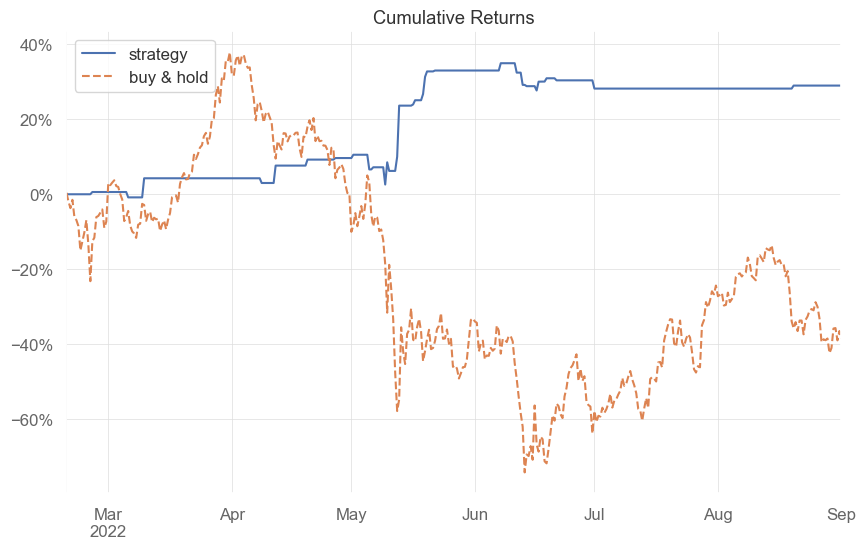

In [2]:
crypto_study = ft.FinStudy(ft.model.LongOnly, data, data_specs=specs)
# tune, train, ensemble, simulate performance
results = crypto_study.explore(n_trials=50, ensemble_size=3)  # this will take some minutes
ft.utils.plot_backtest(results['performance'], results['benchmark'])  # plot backtest

We inspect that our strategy generated 27% cumumatlive returns which is superior to the benchmark that is equivalent to holding all crypto assets (equally weighted). Fintuna by default selects a confidence threshold for entering trades. Therefore, only a couple of trades are exectued over the evaluation period.

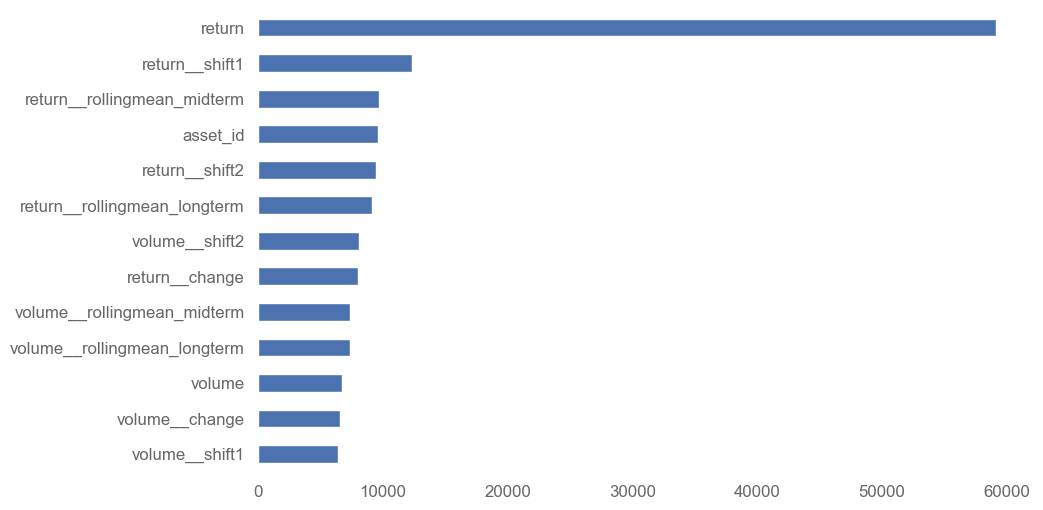

In [3]:
from matplotlib import pyplot as plt
top_features = crypto_study.ensemble.feature_importances().sort_values()
ax = top_features.plot(kind='barh')
ax.grid(False)
plt.show()

Looking at the feature importance we see that trades are essentially based on previous *return*. We are curious whether the model is like a momentum strategy (postivie past returns yield positive future returns) or more like a mean reversion strategy (past returns tend to revert).

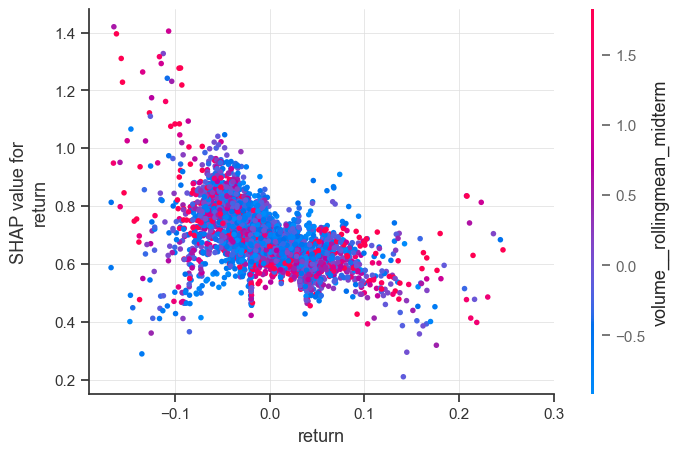

In [4]:
import shap
shap.dependence_plot('return', results['shap'][0].values, results['shap'][2], xmax=0.3)

We inspect that it is in general a weak pattern (but it's finance, so get used to it). The y-axis shows the models confidence for predicting positive returns and the x-axis shows past returns. More common past returns between -8% and +10% (-0.08 and 0.1 on the x-axis) have little predictive information. Though high losses < -8% seem to indicate positive future returns. Especially when there is increased long-term trading volume (red dots in the left corner). To sum up, the model seems to buy assets that had high losses accompanied by high long-term trading volume.